## Basic Libraries

In [11]:
import numpy as np
import pandas as pd
import os

## Libraries for Image 

In [12]:
# import cv2
# import PIL
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

In [13]:

from glob import glob

# Get all image paths under the correct folder
train_path_fake = sorted(glob("AI and real/train/fake/*.jpg"))

# Confirm how many are found
print("✅ Total images found:", len(train_path_fake))
print(train_path_fake[:5])  # Show first few to confirm


✅ Total images found: 4506
['AI and real/train/fake\\0005.jpg', 'AI and real/train/fake\\0006.jpg', 'AI and real/train/fake\\0008.jpg', 'AI and real/train/fake\\0009.jpg', 'AI and real/train/fake\\0010.jpg']


In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model("model.h5")

def check_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Prediction: " + ("fake" if predicted_class == 0 else "real"))
    plt.axis("off")
    plt.show()


## **TRAIN DATAFRAME**

## Creating Training Dataframe for **"Fake Image"**

In [15]:
train_path_fake =[]

base_1 = 'AI and real/train/fake/'

for i in range(1000,6000):
    a = '{}{}.jpg'.format(base_1, i)
    train_path_fake.append(a)

for i in range(1000,6000):
    for j in range(2,11):
        b = '{}{} ({}).jpg'.format(base_1, i, j)
        train_path_fake.append(b)
len(train_path_fake)


50000

In [16]:
df_train_fake = pd.DataFrame(train_path_fake)
df_train_fake.columns = ['path']
df_train_fake['label'] = 0
df_train_fake.head()

,path,label
0,AI and real/train/fake/1000.jpg,0
1,AI and real/train/fake/1001.jpg,0
2,AI and real/train/fake/1002.jpg,0
3,AI and real/train/fake/1003.jpg,0
4,AI and real/train/fake/1004.jpg,0


## Creating Training Dataframe for **"Real Image"**

In [17]:
train_path_real=[]

base_2 = 'AI and real/train/real'

for i in range(0,10):
    c = '{}000{}.jpg'.format(base_2, i)
    train_path_real.append(c)

for i in range(0,10):
    for j in range(2,11):
        d = '{}000{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(d)
len(train_path_real)

100

In [18]:
for i in range(10,100):
    e = '{}00{}.jpg'.format(base_2, i)
    train_path_real.append(e)


for i in range(10,100):
    for j in range(2,11):
        f = '{}00{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(f)
len(train_path_real)

1000

In [19]:
for i in range(100,1000):
    g = '{}0{}.jpg'.format(base_2, i)
    train_path_real.append(g)

for i in range(100,1000):
    for j in range(2,11):
        h = '{}0{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(h)
len(train_path_real)

10000

In [20]:

for i in range(1000,5000):
    k = '{}{}.jpg'.format(base_2, i)
    train_path_real.append(k)

for i in range(1000,5000):
    for j in range(2,11):
        l = '{}{} ({}).jpg'.format(base_2, i,j)
        train_path_real.append(l)
len(train_path_real)


50000

In [21]:
df_train_real = pd.DataFrame(train_path_real)
df_train_real.columns = ['path']
df_train_real['label'] = 1
df_train_real.head()

,path,label
0,AI and real/train/real0000.jpg,1
1,AI and real/train/real0001.jpg,1
2,AI and real/train/real0002.jpg,1
3,AI and real/train/real0003.jpg,1
4,AI and real/train/real0004.jpg,1


## Using **"concat"** to create  **"df_train"**

In [22]:
df_train = pd.concat((df_train_fake, df_train_real), axis = 0 )
print(df_train.shape)
df_train.sample(5)


(100000, 2)


,path,label
49672,AI and real/train/real4963 (7).jpg,1
24186,AI and real/train/real2131 (9).jpg,1
4348,AI and real/train/fake/5348.jpg,0
38039,AI and real/train/real3671 (2).jpg,1
29868,AI and real/train/fake/3763 (3).jpg,0


## Using **'cv2'** for X_train 

In [23]:
import os

# Fix the paths: Add the full directory if needed
df_train['path'] = df_train['path'].apply(lambda x: os.path.join("AI and real", x))


In [24]:
test_path = ("C:/Users/MEKALA POOJA/OneDrive/Desktop/real-vs-ai-generated-image-classification-and-detection-main/AI and real/train/fake/0005.jpg")
img = cv2.imread(test_path)

print("Loaded:", img is not None)


Loaded: True


In [25]:
print(df_train.head())


                                          path  label
0  AI and real\AI and real/train/fake/1000.jpg      0
1  AI and real\AI and real/train/fake/1001.jpg      0
2  AI and real\AI and real/train/fake/1002.jpg      0
3  AI and real\AI and real/train/fake/1003.jpg      0
4  AI and real\AI and real/train/fake/1004.jpg      0


In [26]:
import os

# ✅ Remove rows where the image path doesn't really exist
df_train = df_train[df_train['path'].apply(lambda x: os.path.exists(x))]


In [27]:
import os

base_dir = os.getcwd()

df_train['path'] = df_train['path'].apply(lambda x: os.path.join(base_dir, x))


In [28]:
df_train = df_train[df_train['path'].apply(lambda x: os.path.exists(x))]


In [29]:
import pandas as pd
from glob import glob

# Step 1: Get all image file paths
train_path_fake = sorted(glob("AI and real/train/fake/*.jpg"))

# Step 2: Create the dataframe with 'path' and 'label'
df_train = pd.DataFrame({'path': train_path_fake, 'label': 0})


In [30]:
import cv2
import numpy as np

image_df = []

for image in df_train['path']:
    img = cv2.imread(image)

    if img is None:
        print(f"⚠️ Image not loaded: {image}")
        continue

    resized = cv2.resize(img, (32, 32))
    image_df.append(resized)

# Convert to numpy array
image_array = np.array(image_df)
X_train = image_array / 255  # Normalize pixel values


In [31]:
print("X_train shape:", X_train.shape)


X_train shape: (4506, 32, 32, 3)


In [32]:
print("X_train shape:", X_train.shape)
#print("y_train shape:", y_train.shape)


X_train shape: (4506, 32, 32, 3)


In [33]:
# # image_df = []
# # for image in df_train['path']:
# #     img = cv2.imread(image)
# #     resized = cv2.resize(img,(32,32))
# #     image_df.append(resized)
# # image_array = np.array(image_df)
# # X_train = image_array/255
# # X_train.ndim

# import cv2
# import numpy as np
# import os

# # ✅ Build full absolute path for each image
# base_dir = os.getcwd()
# df_train['path'] = df_train['path'].apply(lambda x: os.path.join(base_dir, x))

# image_df = []

# for image in df_train['path']:
#     img = cv2.imread(image)

#     if img is None:
#         print(f"⚠️ Image not loaded: {image}")
#         continue

#     resized = cv2.resize(img, (32, 32))
#     image_df.append(resized)

# image_array = np.array(image_df)
# x_train = image_array / 255
# print("✅ Shape of x_train:", x_train.shape)

# # Optional: test 1 image
# img = cv2.imread(df_train['path'][10])
# print("✅ Loaded:", img is not None)


In [34]:
print(df_train.head())


                              path  label
0  AI and real/train/fake\0005.jpg      0
1  AI and real/train/fake\0006.jpg      0
2  AI and real/train/fake\0008.jpg      0
3  AI and real/train/fake\0009.jpg      0
4  AI and real/train/fake\0010.jpg      0


In [35]:
y_train = df_train['label']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## **TEST DATAFRAME**

## Creating Testing Dataframe for **"Fake Image"**

In [36]:
test_path_fake =[]

base_3 = 'AI and real/train/fake/'
for i in range(0,1000):
    m = '{}{}.jpg'.format(base_3, i)
    test_path_fake.append(m)
    
for i in range(0,1000):
    for j in range(2,11):
        n = '{}{} ({}).jpg'.format(base_3, i, j)
        test_path_fake.append(n)
len(test_path_fake)


10000

In [37]:
df_test_fake = pd.DataFrame(test_path_fake)
df_test_fake.columns = ['path']
df_test_fake['label'] = 0
df_test_fake.head()

,path,label
0,AI and real/train/fake/0.jpg,0
1,AI and real/train/fake/1.jpg,0
2,AI and real/train/fake/2.jpg,0
3,AI and real/train/fake/3.jpg,0
4,AI and real/train/fake/4.jpg,0


## Creating Testing Dataframe for **"Real Image"**

In [38]:
test_path_real =[]

base_4 = ('AI and real/test/real/0005.jpg')
for i in range(0,10):
    o = '{}000{}.jpg'.format(base_4, i)
    test_path_real.append(o)

for i in range(0,10):
    for j in range(2,11):
        p = '{}000{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(p)
len(test_path_real)


100

In [39]:
for i in range(10,100):
    q = '{}00{}.jpg'.format(base_4, i)
    test_path_real.append(q)

for i in range(10,100):
    for j in range(2,11):
        r = '{}00{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(r)
len(test_path_real) 


1000

In [40]:
for i in range(100,1000):
    s = '{}0{}.jpg'.format(base_4, i)
    test_path_real.append(s)
    
for i in range(100,1000):
    for j in range(2,11):
        t = '{}0{} ({}).jpg'.format(base_4, i,j)
        test_path_real.append(t)
len(test_path_real)

10000

In [41]:
df_test_real = pd.DataFrame(test_path_real)
df_test_real.columns = ['path']
df_test_real['label'] = 1
df_test_real.head()

,path,label
0,AI and real/test/real/0005.jpg0000.jpg,1
1,AI and real/test/real/0005.jpg0001.jpg,1
2,AI and real/test/real/0005.jpg0002.jpg,1
3,AI and real/test/real/0005.jpg0003.jpg,1
4,AI and real/test/real/0005.jpg0004.jpg,1


## Using **"concat"** to create  **"df_test"**

In [42]:
df_test = pd.concat((df_test_fake, df_test_real), axis = 0 )
print(df_test.shape)
df_test.sample(5)


(20000, 2)


,path,label
9787,AI and real/train/fake/976 (5).jpg,0
8681,AI and real/test/real/0005.jpg0853 (6).jpg,1
826,AI and real/test/real/0005.jpg0080 (8).jpg,1
3744,AI and real/train/fake/304 (10).jpg,0
3740,AI and real/test/real/0005.jpg0304 (6).jpg,1


## Using **"cv2"** to create X_test

In [43]:
from glob import glob
import pandas as pd

# Assuming test images are stored like: AI and real/test/fake/ and /real/
test_path_fake = sorted(glob("AI and real/test/fake/*.jpg"))
test_path_real = sorted(glob("AI and real/test/real/*.jpg"))

# Create DataFrames for fake and real
df_test_fake = pd.DataFrame({'path': test_path_fake, 'label': 0})
df_test_real = pd.DataFrame({'path': test_path_real, 'label': 1})

# Combine them
df_test = pd.concat([df_test_fake, df_test_real]).reset_index(drop=True)


In [44]:
import cv2
import numpy as np

image_test_df = []

for image in df_test['path']:
    img = cv2.imread(image)
    
    if img is None:
        print(f"⚠️ Test image not loaded: {image}")
        continue

    resized = cv2.resize(img, (32, 32))
    image_test_df.append(resized)

x_test = np.array(image_test_df)
x_test = x_test / 255  # Normalize

print("✅ Final shape of x_test:", x_test.shape)


✅ Final shape of x_test: (3271, 32, 32, 3)


In [45]:
# image_ds = []
# for image in df_test['path']:
#     imge = cv2.imread(image)
#     resize = cv2.resize(imge,(32,32))
#     image_ds.append(resize)
# image_arry = np.array(image_ds)
# X_test = image_arry/255
# X_test.ndim

In [46]:
y_test = df_test['label']
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Importing **"keras"** for CNN

In [47]:
# Make sure these exist
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Then fit the model
model.fit(X_train, y_train, epochs=5)


X_train shape: (4506, 32, 32, 3)
y_train shape: (4506,)
Epoch 1/5
141/141 [==============================] - 5s 30ms/step - loss: 5.0530e-09 - accuracy: 1.0000
Epoch 2/5
141/141 [==============================] - 4s 31ms/step - loss: 5.0266e-09 - accuracy: 1.0000
Epoch 3/5
141/141 [==============================] - 4s 30ms/step - loss: 4.9736e-09 - accuracy: 1.0000
Epoch 4/5
141/141 [==============================] - 4s 32ms/step - loss: 4.9207e-09 - accuracy: 1.0000
Epoch 5/5
141/141 [==============================] - 4s 30ms/step - loss: 4.8414e-09 - accuracy: 1.0000


In [48]:
# from tensorflow.keras import models , layers

# model = models.Sequential([
#     layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
#     layers.MaxPool2D((2,2)),
#     layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
#     layers.MaxPool2D((2,2)),
#     layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
#     layers.MaxPool2D((2,2)),
    
#     layers.Flatten(),
#     layers.Dense(10,activation = 'relu'),
#     layers.Dense(2,activation = 'sigmoid'),
#                          ])

# model.compile(
#     optimizer = 'adam',
#     loss= 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
#              )

# model.fit(X_train,y_train, epochs = 5)
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(80, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(20, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='softmax')  # ✅ Use softmax here
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=25)



Epoch 1/25
141/141 [==============================] - 5s 30ms/step - loss: 0.0253 - accuracy: 0.9929
Epoch 2/25
141/141 [==============================] - 4s 29ms/step - loss: 5.9404e-07 - accuracy: 1.0000
Epoch 3/25
141/141 [==============================] - 4s 29ms/step - loss: 5.7839e-07 - accuracy: 1.0000
Epoch 4/25
141/141 [==============================] - 4s 29ms/step - loss: 5.5938e-07 - accuracy: 1.0000
Epoch 5/25
141/141 [==============================] - 4s 29ms/step - loss: 5.3799e-07 - accuracy: 1.0000
Epoch 6/25
141/141 [==============================] - 4s 29ms/step - loss: 5.1467e-07 - accuracy: 1.0000
Epoch 7/25
141/141 [==============================] - 4s 29ms/step - loss: 4.8805e-07 - accuracy: 1.0000
Epoch 8/25
141/141 [==============================] - 4s 30ms/step - loss: 4.5891e-07 - accuracy: 1.0000
Epoch 9/25
141/141 [==============================] - 4s 29ms/step - loss: 4.3251e-07 - accuracy: 1.0000
Epoch 10/25
141/141 [==============================] - 4s 2

In [49]:
from glob import glob
import pandas as pd

# Adjust path as needed (real or fake test images)
test_path_fake = sorted(glob("AI and real/test/fake/*.jpg"))
df_test = pd.DataFrame({'path': test_path_fake, 'label': 0})


In [50]:
test_path_real = sorted(glob("AI and real/test/real/*.jpg"))
df_real = pd.DataFrame({'path': test_path_real, 'label': 1})

# Combine fake and real
df_test = pd.concat([df_test, df_real]).reset_index(drop=True)


In [51]:
import cv2
import numpy as np

image_ds = []

for image in df_test['path']:
    imge = cv2.imread(image)

    if imge is None:
        print(f"⚠️ Image not loaded: {image}")
        continue

    resize = cv2.resize(imge, (32, 32))
    image_ds.append(resize)

image_arry = np.array(image_ds)
X_test = image_arry / 255  # Normalize


In [52]:
y_test = df_test['label'].values


In [53]:
model.evaluate(X_test, y_test)


103/103 [==============================] - 1s 11ms/step - loss: 23.3737 - accuracy: 0.3886


[23.373674392700195, 0.38856619596481323]

In [54]:
model.evaluate(X_test,y_test)

103/103 [==============================] - 1s 11ms/step - loss: 23.3737 - accuracy: 0.3886


[23.373674392700195, 0.38856619596481323]

In [55]:
y_pred  = model.predict(X_test)

103/103 [==============================] - 1s 10ms/step


In [56]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[0, 0, 0, 0, 0]

## Classification Report

In [57]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred_label))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.39      1.00      0.56      1271
           1       0.00      0.00      0.00      2000

    accuracy                           0.39      3271
   macro avg       0.19      0.50      0.28      3271
weighted avg       0.15      0.39      0.22      3271



c:\Users\MEKALA POOJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MEKALA POOJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MEKALA POOJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix 

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred_label)

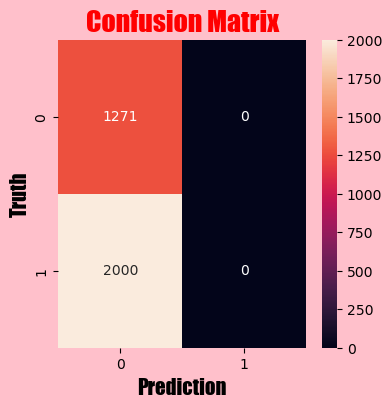

In [59]:
import matplotlib.pyplot as plt
import seaborn as sn


plt.figure(figsize=(4,4), facecolor= 'pink', edgecolor='brown')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'black','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'black','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'red','size':20})
plt.show()

## **THANK YOU !**

In [60]:
model.save("model.h5")


c:\Users\MEKALA POOJA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
!pip install streamlit


In [62]:
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Load the model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("model.h5")  # ✅ Make sure this matches your saved file
    return model

model = load_model()

st.title("🧠 Real vs AI-Generated Image Detector")
st.write("Upload an image to classify it as **Real** or **AI-generated (Fake)**.")

uploaded_file = st.file_uploader("📤 Upload Image", type=["jpg", "jpeg", "png"])

def preprocess_image(image):
    img = image.resize((32, 32))               # ✅ Resize
    img = np.array(img) / 255.0                # ✅ Normalize
    img = np.expand_dims(img, axis=0)          # ✅ Add batch dimension
    return img

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    processed = preprocess_image(image)
    prediction = model.predict(processed)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    class_names = ['Fake Image', 'Real Image']
    
    st.markdown(f"### Prediction: **{class_names[predicted_class]}**")
    st.markdown(f"Confidence: `{confidence:.2f}%`")


2025-06-25 01:30:01.555 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 01:30:04.646 
  command:

    streamlit run c:\Users\MEKALA POOJA\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-25 01:30:04.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 01:30:04.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 01:30:04.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 01:30:04.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 01:30:04.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 01:30:04.770 Thread 'MainThre

In [63]:
!streamlit run Newapp.py


^C
